# Final Project: Mat2Vec Homework

Vectorized word embeddings are a common method in natural language processing to featurize corpora of texts; one of the most frequently used algorithms for this is [Word2Vec](https://en.wikipedia.org/wiki/Word2vec). The core principle of training a model with these embeddings is that words with similar meanings and uses will often appear in similar contexts. To see this in action, check out [Semantle](https://semantle.com/), a Wordle-like game where vectorized word embeddings are used to measure how close a guess is to the secret word. Because semantic similarity is measured based on a word's neighbors, part of speech is also reflected in it; notice that turninng a noun like "happiness" into an adjective like "happy" or an adverb like "happily" will often produce VERY different scores.

[Mat2Vec](https://www.nature.com/articles/s41586-019-1335-8) is a publically-available Python library which contains vectorized word embeddings that were trained on materials science abstracts. We will compare this library to a general word embedding model and see how it performs in both descriptive and predictive tasks.

## Install Mat2Vec

Set your path to the current directory, then move into `mat2vec-master` to install everything

In [1]:
path = "/Users/adenweiser/Documents/Documents - MacBook Pro (3)/Masters Degree/Spring 2024/Materials Informatics/Final Project"

In [2]:
import os
os.path.isdir(path)

import sys
sys.path.append(path)

In [3]:
#change your directory to the mat2vec-master directory
library_path = os.path.join(path, 'mat2vec-master')
os.chdir(library_path)

In [7]:
#use pip to install mat2vec's requirements
%pip install --ignore-installed -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 635.8 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 43.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.8/281.8 kB 6.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 31.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.8/182.8 kB 6.4 MB/s eta 0:00:00
  

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


Run the installation after pip works its magic

In [9]:
!python setup.py install

2024-05-31 12:48:31,263 : INFO : running install
/Users/adenweiser/Documents/Documents - MacBook Pro (3)/Masters Degree/Spring 2024/Materials Informatics/Final Project/.conda/lib/python3.8/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
2024-05-31 12:48:31,709 : INFO : Starting download for pretrained_embeddings
35.8kKB [00:02, 14.3kKB/s]                                                      
2024-05-31 12:48:34,475 : INFO : pretrained_embeddings successfully downloaded.
2024-05-31 12:48:3

Download the chemical data extractor

In [10]:
!cde data download

INFO:chemdataextractor.data:Downloading http://data.chemdataextractor.org/models/cem_crf-1.0.pickle to /Users/adenweiser/Library/Application Support/ChemDataExtractor/models/cem_crf-1.0.pickle
INFO:chemdataextractor.data:Downloading http://data.chemdataextractor.org/models/cem_crf_chemdner_cemp-1.0.pickle to /Users/adenweiser/Library/Application Support/ChemDataExtractor/models/cem_crf_chemdner_cemp-1.0.pickle
INFO:chemdataextractor.data:Downloading http://data.chemdataextractor.org/models/cem_dict_cs-1.0.pickle to /Users/adenweiser/Library/Application Support/ChemDataExtractor/models/cem_dict_cs-1.0.pickle
INFO:chemdataextractor.data:Downloading http://data.chemdataextractor.org/models/cem_dict-1.0.pickle to /Users/adenweiser/Library/Application Support/ChemDataExtractor/models/cem_dict-1.0.pickle
INFO:chemdataextractor.data:Downloading http://data.chemdataextractor.org/models/clusters_chem1500-1.0.pickle to /Users/adenweiser/Library/Application Support/ChemDataExtractor/models/cluste

In [46]:
#Test to make sure that this actually worked
from mat2vec.processing import MaterialsTextProcessor
text_processor = MaterialsTextProcessor()
text_processor.process("LiCoO2 is a battery cathode material.")

(['CoLiO2', 'is', 'a', 'battery', 'cathode', 'material', '.'],
 [('LiCoO2', 'CoLiO2')])

## Imports (Run after installation)

In [47]:
from mat2vec.processing import MaterialsTextProcessor
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gensim.downloader as api

## Part 1: Analogies with Mat2Vec

Start by creating a Word2Vec model with the Mat2Vec pretrained embeddings

In [48]:
#from gensim.models import Word2Vec
text_processor = MaterialsTextProcessor()
m2v_model = Word2Vec.load("mat2vec/training/models/pretrained_embeddings")

Here are 3 examples of analogies with Mat2Vec. Note that materials formulae need to be normalized before using them in an analogy.

In [49]:
# helium : He :: <iron> : Fe
answer1 = m2v_model.wv.most_similar(positive=["helium", "Fe"], negative=["He"], topn=1)
print(answer1)
print("helium is to He as " + answer1[0][0] + " is to Fe")

#cubic : GaAs :: <hexagonal> : CdSe
answer2 = m2v_model.wv.most_similar(positive=["cubic", text_processor.normalized_formula("CdSe")], negative=[text_processor.normalized_formula("GaAs")], topn=10)
print(answer2)
print("cubic is to GaAs as " + answer2[0][0] + " is to CdSe")

#likely : unlikely :: <efficient> : inefficient
answer3 = m2v_model.wv.most_similar(positive=["likely", "inefficient"], negative=["unlikely"], topn=10)
print(answer3)
print("likely is to unlikely as " + answer3[0][0] + " is to inefficient")

[('iron', 0.7700884342193604)]
helium is to He as iron is to Fe
[('hexagonal', 0.616279661655426), ('tetragonal', 0.5884194374084473), ('hawleyite', 0.5877892971038818), ('cubic_zinc_blende', 0.5489957332611084), ('face_centered_cubic', 0.5380300879478455), ('rhombohedral', 0.5318731069564819), ('wurtzite', 0.5312954187393188), ('monoclinic', 0.5239373445510864), ('cubic_symmetry', 0.5221707224845886), ('CdS', 0.5142473578453064)]
cubic is to GaAs as hexagonal is to CdSe
[('more_efficient', 0.6114804148674011), ('intensive', 0.5613003373146057), ('inefficiency', 0.5521104335784912), ('largely', 0.5477011203765869), ('consequently', 0.5408303737640381), ('efficient', 0.5353732109069824), ('intensified', 0.5209261178970337), ('excessive', 0.5180298686027527), ('Ce17Fe80Sb240', 0.5167422294616699), ('major_bottlenecks', 0.5153635144233704)]
likely is to unlikely as more_efficient is to inefficient


**Problem 1:** Which of these analogies produced the correct answer as the top suggestion? Which one(s) did not? For the analogy/analogies that didn't get the correct answer, what was the answer provided, and what rank does the correct answer appear at? 

*Solution:* The first analogy, comparing element names to their symbols, and the second analogy comparing crystal symmetry, were correct, but the other analogy was incorrect.  When comparing antonyms, "more efficient" was a better match than "efficient"; the analogy has the correct answer as the sixth-most similar.

The variety of analogy files listed below have a variety of analogies in the format:
`H helium Fe iron`
Write code to do the following tasks:
* Read in each `.txt` file and process the data. You can split a line into a list of words using `.split(" ")`. This process is called tokenization in natural language processing. *N.B.* Each line ends with a new line delimiter that should be removed with `.rsplit("\n")`
* Find the most similar word for the analogy as given above. The `positive` terms should be the second and third in the analogy, and the `negative` terms should be the first in the line.
* Compare Mat2Vec's results to the third word in the raw data, and keep the performance on each file in a dictionary

For reference:
* `crystalstructures1` is the type of crystal system for the compound (cubic, tetragonal, hexagonal, etc.)
* `crystalstructures2` is the type of crystal structure for the compound (zinc blende, wurtzite, etc.)
* `crystalstructures3` is the type of symmetry in elemental crystals (bcc, fcc, etc.)

In [50]:
# Clean the data before running the analogies

extensions = ["comparative", "crystalstructures1", "crystalstructures2", "crystalstructures3", "elementnames", "magnetism", "nounplurals", "opposites", "oxides", "participle", "pasttense", "superlative", "units", "verbplurals"]

#which files need to normalize chemical formulae?
clean02 = ["data/analogies_" + str + ".txt" for str in ["crystalstructures1", "crystalstructures2", "magnetism", "oxides"]]
clean13 = ["data/analogies_" + str + ".txt" for str in ["oxides"]]


vocabulary = vocabulary = m2v_model.wv.index_to_key
cleaned_data={}
for extension in extensions:
    filename = "data/analogies_" + extension + ".txt"
    print("processing " + filename.split("/")[1])
    analogies = []
    #TODO: Read in the files and correctly split the analogy terms
    with open(filename, "r") as file:
        for line in file.readlines():
            analogies.append(line.rstrip("\n").split(" ")) #rstrip needed to clean text
    if filename in clean02:
        analogies = [[text_processor.normalized_formula(i[0]), i[1], text_processor.normalized_formula(i[2]), i[3]] for i in analogies]
    if filename in clean13:
        analogies = [[i[0], text_processor.normalized_formula(i[1]), i[2], text_processor.normalized_formula(i[3])] for i in analogies]
    #TODO: ^^^^^^^^^^^
    cleaned_data[extension] = analogies

processing analogies_comparative.txt
processing analogies_crystalstructures1.txt
processing analogies_crystalstructures2.txt
processing analogies_crystalstructures3.txt
processing analogies_elementnames.txt
processing analogies_magnetism.txt
processing analogies_nounplurals.txt
processing analogies_opposites.txt
processing analogies_oxides.txt
processing analogies_participle.txt
processing analogies_pasttense.txt
processing analogies_superlative.txt
processing analogies_units.txt
processing analogies_verbplurals.txt


In [51]:
scores = {}
notfound = {}

for extension in extensions:
    print("Evaluating " + extension)
    analogies = cleaned_data[extension]
    num_trials = len(analogies)
    num_correct = 0
    num_notfound = 0
    for analogy in analogies:
        if analogy[0] not in vocabulary or analogy[1] not in vocabulary or analogy[2] not in vocabulary:
            #print("Analogy has words not found in vocabulary:\t" + str(analogy))
            num_notfound += 1
        else:
            #TODO: test the accuracy of the model for each analogy and find its accuracy
            guess = m2v_model.wv.most_similar(positive=[analogy[1], analogy[2]], negative=[analogy[0]], topn=1)[0][0]
            if guess == analogy[3]:
                num_correct += 1
            #TODO: ^^^^^^^

    scores[extension] = num_correct/(num_trials-num_notfound)
    notfound[extension] = num_notfound

scores

Evaluating comparative
Evaluating crystalstructures1
Evaluating crystalstructures2
Evaluating crystalstructures3
Evaluating elementnames
Evaluating magnetism
Evaluating nounplurals
Evaluating opposites
Evaluating oxides
Evaluating participle
Evaluating pasttense
Evaluating superlative
Evaluating units
Evaluating verbplurals


{'comparative': 0.7523076923076923,
 'crystalstructures1': 0.368609865470852,
 'crystalstructures2': 0.19102990033222592,
 'crystalstructures3': 0.5058430717863105,
 'elementnames': 0.6196581196581197,
 'magnetism': 0.41986062717770034,
 'nounplurals': 0.9355459355459356,
 'opposites': 0.4444444444444444,
 'oxides': 0.5138461538461538,
 'participle': 0.48735119047619047,
 'pasttense': 0.41786600496277915,
 'superlative': 0.5215384615384615,
 'units': 0.40486725663716816,
 'verbplurals': 0.6733870967741935}

Plot the scores by file

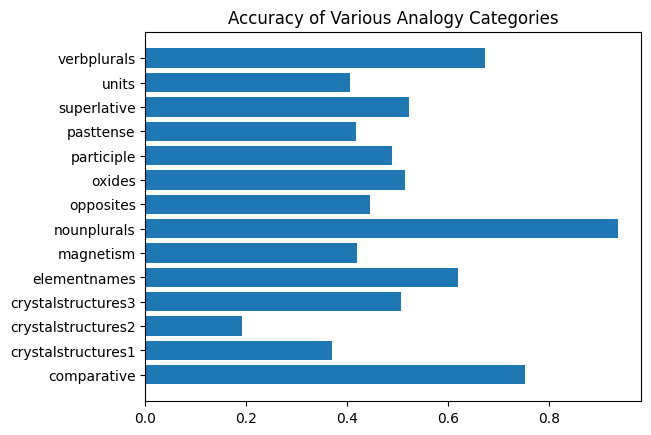

In [52]:
fig, ax = plt.subplots()
ax.barh(np.arange(len(scores)), scores.values())
ax.set_yticks(np.arange(len(scores)), labels=scores.keys())
plt.title("Accuracy of Various Analogy Categories")
plt.show()

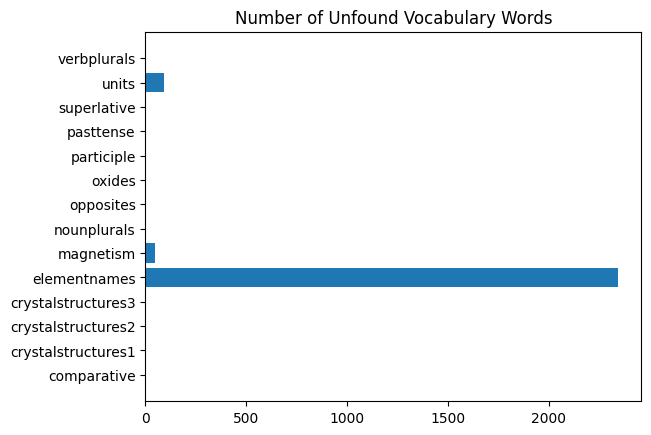

In [53]:
fig, ax = plt.subplots()
ax.barh(np.arange(len(notfound)), notfound.values())
ax.set_yticks(np.arange(len(notfound)), labels=notfound.keys())
plt.title("Number of Unfound Vocabulary Words")
plt.show()

**Problem 2a:** Which categories of analogies does Mat2Vec perform well on? Which ones have low accuracies? Does Mat2Vec tend to perform better on scientific tasks or linguistic tasks?

*Solution:* Mat2Vec performs well on (from best to worst) making plural nouns, finding comparative adjectives, and making plural verbs. Mat2Vec performs poorly on (from worst to best) finding the crystal structure of a compound, finding crystal symmetry, and making past tense verbs. Mat2Vec tends to perform better on linguistic tasks than scientific tasks.

**Problem 2b:** Which categories contain words not found in the vocabulary of Mat2Vec? What do these words have in common (this will involve adding code to the above processing)? What are some of the implications of using this in predictive tasks?

*Solution:* The element names category contains several words not found in Mat2Vec's vocabulary. These words are high atomic number elements, such as bohrium or einsteinium. This means that predictions with Mat2Vec will not include these elements, which can be good to ensure synthesizability, but could also potentially limit the quality of these predictions if these elements could be somehow stabilized. There are also a few unfound vocabulary words in the magnetism and unit categories.

Now, modify the above code to compare analogy performance on the top 5 guesses, not just the best prediction. Plot the accuracies with this method compared to using the top guess only.

In [54]:
##TODO: implement solution
scores5 = {}
notfound5 = {}

for extension in extensions:
    print("Evaluating " + extension)
    analogies = cleaned_data[extension]
    num_trials = len(analogies)
    num_correct = 0
    num_notfound = 0
    for analogy in analogies:
        if analogy[0] not in vocabulary or analogy[1] not in vocabulary or analogy[2] not in vocabulary:
            #print("Analogy has words not found in vocabulary:\t" + str(analogy))
            num_notfound += 1
        else:
            #TODO: test the accuracy of the model for each analogy and find its accuracy
            guesses = m2v_model.wv.most_similar(positive=[analogy[1], analogy[2]], negative=[analogy[0]], topn=5)
            guesses = [guess[0] for guess in guesses]
            if analogy[3] in guesses:
                num_correct += 1
            #TODO: ^^^^^^^

    scores5[extension] = num_correct/(num_trials-num_notfound)
    notfound5[extension] = num_notfound

scores5


Evaluating comparative
Evaluating crystalstructures1
Evaluating crystalstructures2
Evaluating crystalstructures3
Evaluating elementnames
Evaluating magnetism
Evaluating nounplurals
Evaluating opposites
Evaluating oxides
Evaluating participle
Evaluating pasttense
Evaluating superlative
Evaluating units
Evaluating verbplurals


{'comparative': 0.9261538461538461,
 'crystalstructures1': 0.7089686098654708,
 'crystalstructures2': 0.4219269102990033,
 'crystalstructures3': 0.8697829716193656,
 'elementnames': 0.6918803418803419,
 'magnetism': 0.7822299651567944,
 'nounplurals': 0.9872534872534873,
 'opposites': 0.5555555555555556,
 'oxides': 0.8015384615384615,
 'participle': 0.7785218253968254,
 'pasttense': 0.7109181141439206,
 'superlative': 0.8523076923076923,
 'units': 0.6814159292035398,
 'verbplurals': 0.8971774193548387}

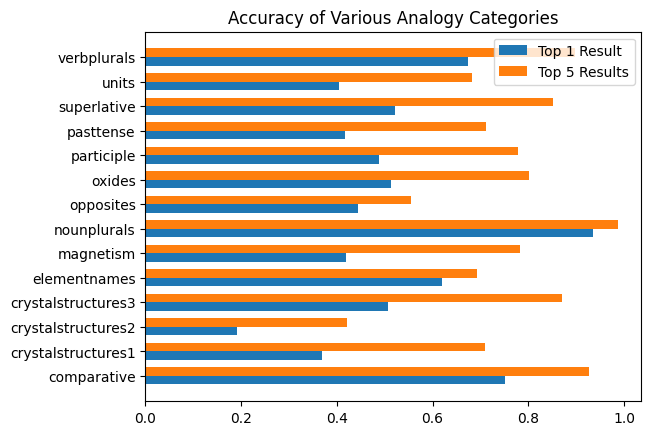

In [55]:
labels = list(scores.keys())
scores_values = list(scores.values())
scores5_values = list(scores5.values())

n = len(scores)
bar_width = 0.35
index = np.arange(n)
fig, ax = plt.subplots()

bar1 = ax.barh(index, scores_values, bar_width, label='Top 1 Result')
bar2 = ax.barh(index + bar_width, scores5_values, bar_width, label='Top 5 Results')

ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(labels)

plt.title("Accuracy of Various Analogy Categories")
plt.legend()

plt.show()

**Problem 3:** Which categories saw the greatest boost to performance when more answers are considered?

*Solution:* The top three categories that saw a boost when considering more answers were elemental crystal structures (36.4%), magnetism (36.2%), and crystal symmetries (34.0%).

## Part 2: Predictions with Mat2Vec

Start by loading a model with the pre-trained embeddings

In [63]:
#from gensim.models import Word2Vec
m2v_model = Word2Vec.load("mat2vec/training/models/pretrained_embeddings")

Import the thermoelectric data into Pandas and extract the power factor.

In [104]:
#import pandas as pd
te_data = pd.read_json('thermoelectric_data/TE_data_used_in_paper.json', orient='index')
print(len(te_data))
te_data_cleaned = te_data.dropna()
te_data_cleaned['power factors'] = te_data_cleaned[2].apply(lambda x: x[0])
print(len(te_data_cleaned))
te_data_cleaned

35681
9483


/var/folders/42/1tm0lh9x4mq_b_x54vd3y4700000gn/T/ipykernel_33278/4216401372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_data_cleaned['power factors'] = te_data_cleaned[2].apply(lambda x: x[0])


,0,1,2,power factors
Bi2Te3,"{'Bi2Te3': 2523, '(Bi2Te3)0.9': 6, 'Bi40Te60':...",True,"[45.7130918959144, 126.38, 134.53]",45.713092
BiSb3Te6,"{'Bi0.5Sb1.5Te3': 345, '(Bi0.25Sb0.75)2Te3': 3...",True,"[37.33, 121.1, 129.79]",37.330000
PbTe,"{'PbTe': 2646, '(PbTe)4': 1, '(PbTe)0.94': 2, ...",True,"[107.09, 463.02, 463.02]",107.090000
CoSb3,"{'CoSb3': 802, 'Co4Sb12': 38, 'Co8Sb24': 2, 'S...",True,"[28.179924788595304, 85.83, 85.83]",28.179925
PbSnTe2,{'Pb0.5Sn0.5Te': 18},True,"[35.23, 240.68, 254.36]",35.230000
...,...,...,...,...
H2O5SiZn2,"{'Zn4Si2O7(OH)2(H2O)': 2, 'Zn2SiO3(OH)2': 5, '...",False,"[7.242766367675375, 15.274113884807385, 15.957...",7.242766
Cl2O,"{'Cl2O': 28, 'ClOCl': 2, 'OCl2': 1}",False,"[11.341412435056418, 17.190252121437453, 19.91...",11.341412
KO4P,{'KPO4': 4},False,"[45.02189544603392, 53.01707373605032, 79.5105...",45.021895
OU,"{'U2O2': 1, 'U4O4': 1, 'UO1': 6}",False,"[3.221937506067408, 3.221937506067408, 3.22193...",3.221938


In [116]:
te_data2[te_data2['formula']=='Bi2Te3']

,formula,mpid,m-id,spacegroup,band gap (eV),ehull (eV),T @ best avg pf [1e20/600K],c @ best avg pf [1e20/600K],pf @ best avg pf [1e20/600K],type @ best avg pf [1e20/600K],...,pf @ best avg pf [1e21/1000K],type @ best avg pf [1e21/1000K],xyz @ best avg pf [1e21/1000K],T @ best pf direction [1e21/1000K],c @ best pf direction [1e21/1000K],pf @ best pf direction [1e21/1000K],type @ best pf direction [1e21/1000K],xyz @ best pf direction [1e21/1000K],data source,tags
35447,Bi2Te3,mp-568390,NaN,166.0,0.000000,0.245181,400,1.000000e+20,45.713092,p,...,45.713092,p,"[87.50968698910734, 24.28076089688005, 25.3488...",500,1.000000e+20,94.725846,p,"[94.72584564505951, 20.521688761082117, 21.775...",mp thermoelectrics,NaN
37431,Bi2Te3,mp-34202,NaN,166.0,0.331203,0.000000,600,1.000000e+20,31.408704,p,...,66.306221,n,"[47.832588418810374, 75.75665619405704, 75.329...",1000,1.000000e+20,75.756656,n,"[47.832588418810374, 75.75665619405704, 75.329...",mp thermoelectrics,NaN


Extract the similarity between each compound and "thermoelectric"

In [105]:
def similarity_or_nan(formula):
    formula = text_processor.normalized_formula(formula)
    try:
        return m2v_model.wv.similarity('thermoelectric', formula)
    except:
        return np.NaN

te_data_cleaned['cosine similarity'] = te_data_cleaned.index.to_series().apply(similarity_or_nan)
te_data_cleaned = te_data_cleaned.sort_values(by='cosine similarity', ascending=False).dropna()
print(len(te_data_cleaned))
te_data_cleaned

9413


/var/folders/42/1tm0lh9x4mq_b_x54vd3y4700000gn/T/ipykernel_33278/844854884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_data_cleaned['cosine similarity'] = te_data_cleaned.index.to_series().apply(similarity_or_nan)


,0,1,2,power factors,cosine similarity
Bi2Te3,"{'Bi2Te3': 2523, '(Bi2Te3)0.9': 6, 'Bi40Te60':...",True,"[45.7130918959144, 126.38, 134.53]",45.713092,0.748016
BiSb3Te6,"{'Bi0.5Sb1.5Te3': 345, '(Bi0.25Sb0.75)2Te3': 3...",True,"[37.33, 121.1, 129.79]",37.330000,0.685899
Cu3SbSe4,{'Cu3SbSe4': 56},True,"[34.97, 72.58, 81.63]",34.970000,0.658001
CoNbSb,"{'NbCoSb': 7, 'CoNbSb': 1}",True,"[15.740400933982196, 42.62628632244185, 42.626...",15.740401,0.647896
BiCuOSe,"{'BiCuSeO': 180, 'BiCuOSe': 14, 'BiOCuSe': 12}",True,"[29.01452830746749, 79.79, 93.44]",29.014528,0.647477
...,...,...,...,...,...
C3O2,"{'C3O2': 89, 'C7C8O10': 1, 'CO2CC': 1}",False,"[8.754028307160176, 8.754028307160176, 23.9487...",8.754028,0.014251
KO,"{'K1O': 2, '(KO)2': 1, 'OK1': 1, 'K2O2': 8, 'O...",False,"[16.399524428347956, 22.842651069666893, 36.15...",16.399524,0.013980
ITi,"{'TiI': 23, 'ITi': 14, 'I(Ti)': 3}",False,"[5.318269911819626, 11.628053730833301, 17.693...",5.318270,0.009128
CK,"{'CCK2': 40, 'CK1': 61, 'K1C': 92, 'KC1': 118,...",False,"[18.228623852708033, 24.02754476700489, 34.326...",18.228624,0.001696


**Problem 4:** How many compounds were included in the initial data? How many were kept after checking for power factor? How many were kept after computing cosine similarity?

*Solution:* 35681 compounds were initially present in the data, with 9483 having power factors in the dataset, and 9413 having cosine similarities.

Text(0.5, 1.0, 'Power Factor vs. Measured Similarity with "Thermoelectric"')

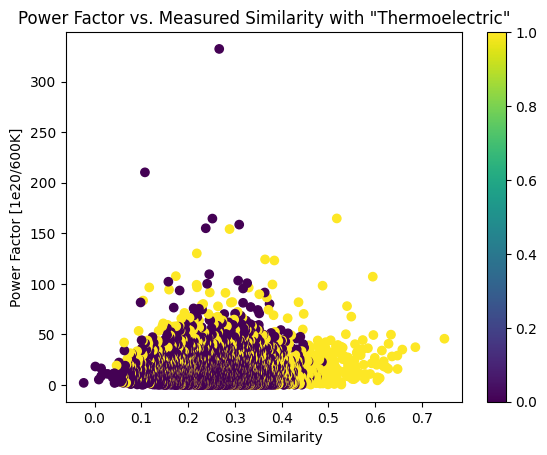

In [118]:
sc = plt.scatter(te_data_cleaned['cosine similarity'], te_data_cleaned['power factors'], c=te_data_cleaned[1])
plt.colorbar(sc)
plt.xlabel('Cosine Similarity')
plt.ylabel("Power Factor [1e20/600K]")
plt.title('Power Factor vs. Measured Similarity with \"Thermoelectric\"')

**Problem 5:** What trends can you see from the above graph?

*Solution:* Compounds with high cosine similarity to "thermoelectric" all have 'True' values (and have been previously verified as good thermoelectrics?). Compounds with lower cosine similarity have more 'False' values, but still have a wide range of power factor values, meaning that there are potentially good candidate materials in the unverified data.

Now, try to predict compounds with uncomputed power factors as good candidate thermoelectrics!

In [141]:
te_data_uncomputed = te_data[te_data[2].isna()]
te_data_uncomputed

,0,1,2
Pb2SeTe,"{'PbSe0.5Te0.5': 9, 'PbTe0.5Se0.5': 4}",True,None
Ca3Co4O9,{'Ca3Co4O9': 416},True,None
Bi2Sb8Te15,"{'Bi0.4Sb1.6Te3': 111, '(Bi0.2Sb0.8)2Te3': 33,...",True,None
Bi3Sb17Te30,"{'Bi0.3Sb1.7Te3': 4, '(Bi0.15Sb0.85)2Te3': 5}",True,None
Mg10Si4Sn,{'Mg2Si0.8Sn0.2': 7},True,None
...,...,...,...
Cl2HN,{'NHCl2': 14},False,None
BP9,{'P45B5': 6},False,None
CCl2H3N,{'CH3NCl2': 7},False,None
AlAm,"{'AmAl': 5, 'AlAm': 2}",False,None


Modify the above code to find the best materials without listed power factors. Look some of these materials up. Are they listed as thermoelectrics?

In [143]:
te_data_uncomputed['cosine similarity'] = te_data_uncomputed.index.to_series().apply(similarity_or_nan)
te_data_uncomputed = te_data_uncomputed.sort_values(by='cosine similarity', ascending=False)
te_data_uncomputed

,0,1,2,cosine similarity
AgMgSb,"{'MgAgSb': 8, 'AgMgSb': 1}",True,None,0.700259
Bi20Se3Te27,"{'Bi2Se0.3Te2.7': 25, 'Bi2Te2.7Se0.3': 122, 'B...",True,None,0.688319
SSe4Sn5,"{'SnS0.2Se0.8': 7, 'SnSe0.8S0.2': 1}",True,None,0.673063
Bi10Se3Te12,"{'Bi2Te2.4Se0.6': 24, 'Bi2(Te0.8Se0.2)3': 6, '...",True,None,0.671917
Bi19LuTe30,"{'Bi1.9Lu0.1Te3': 6, 'Lu0.1Bi1.9Te3': 2}",True,None,0.670335
...,...,...,...,...
B6407S,{'SB6407': 9},False,None,NaN
F30PS,{'SPF30': 4},False,None,NaN
BP9,{'P45B5': 6},False,None,NaN
CCl2H3N,{'CH3NCl2': 7},False,None,NaN


**Problem 6:** What are the top three materials similar to "thermoelectric" without included power factors? Look them up - are they in literature as being good thermoelectric materials?

*Solution:* The top 3 materials similar to "thermoelectric" without power factors included are MgAgSb, Bi2Se0.3Te2.7, and SnS0.2Se0.8. All three of these have papers that show up immediately on Google that reference their thermoelectric properties.

## Part 3: Comparisons with Other Embeddings

The [Google News](https://huggingface.co/fse/word2vec-google-news-300) embedding is one of the most common general-purpose models used with Word2Vec. The objectives of the next part are to show the difference in data quality on a custom-trained model vs. a general-purpose model.

First, load in the Google News embeddings. This takes about 1.5 GB of storage.

In [24]:
#import gensim.downloader as api
# Load a pre-trained Word2Vec model from Gensim
w2v_model = api.load("word2vec-google-news-300")


In [57]:
print(len(w2v_model.index_to_key))
print(len(m2v_model.wv.index_to_key))

3000000
529686


**Problem 7:** How many unique words are included in the Google News model? How many are in the Mat2Vec model?

*Solution:* There are 3 million unique words in the Google News model, and only 529,686 in the Mat2Vec model.

Next, rerun the same process as before, using the general-purpose model instead of the custom-built Mat2Vec.

In [58]:
w_scores = {}
w_notfound = {}
w_vocabulary = w2v_model.index_to_key
for extension in extensions:
    print("Evaluating " + extension)
    analogies = cleaned_data[extension]
    num_trials = len(analogies)
    num_correct = 0
    num_notfound = 0
    for analogy in analogies:
        if analogy[0] not in w_vocabulary or analogy[1] not in w_vocabulary or analogy[2] not in w_vocabulary:
            #print("Analogy has words not found in vocabulary:\t" + str(analogy))
            num_notfound += 1
        else:
            #TODO: test the accuracy of the model for each analogy and find its accuracy
            guess = w2v_model.most_similar(positive=[analogy[1], analogy[2]], negative=[analogy[0]], topn=1)[0][0]
            if guess == analogy[3]:
                num_correct += 1
            #TODO: ^^^^^^^

    w_scores[extension] = num_correct/(num_trials-num_notfound)
    w_notfound[extension] = num_notfound

w_scores

Evaluating comparative
Evaluating crystalstructures1
Evaluating crystalstructures2
Evaluating crystalstructures3
Evaluating elementnames
Evaluating magnetism
Evaluating nounplurals
Evaluating opposites
Evaluating oxides
Evaluating participle
Evaluating pasttense
Evaluating superlative
Evaluating units
Evaluating verbplurals


{'comparative': 0.9153846153846154,
 'crystalstructures1': 0.0,
 'crystalstructures2': 0.0,
 'crystalstructures3': 0.0,
 'elementnames': 0.006273867975995636,
 'magnetism': 0.1,
 'nounplurals': 0.8085618085618086,
 'opposites': 0.4017094017094017,
 'oxides': 0.008,
 'participle': 0.7415674603174603,
 'pasttense': 0.6364764267990074,
 'superlative': 0.8830769230769231,
 'units': 0.008771929824561403,
 'verbplurals': 0.7106854838709677}

Compare the number of unfound words and accuracies between the two models.

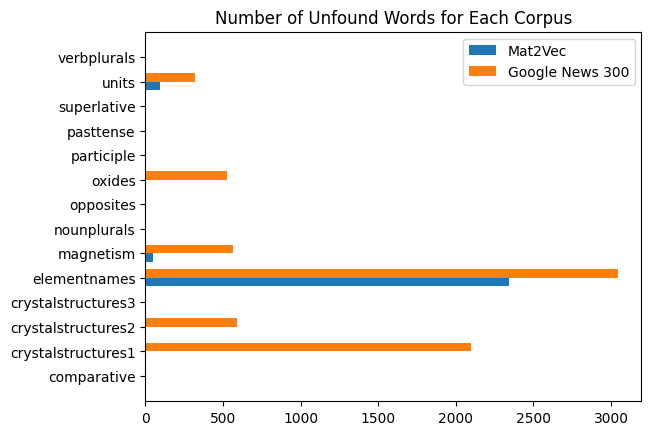

In [59]:
labels = list(notfound.keys())
m2v_unfound = list(notfound.values())
w2v_unfound = list(w_notfound.values())

n = len(m2v_unfound)
bar_width = 0.35
index = np.arange(n)
fig, ax = plt.subplots()

bar1 = ax.barh(index, m2v_unfound, bar_width, label='Mat2Vec')
bar2 = ax.barh(index + bar_width, w2v_unfound, bar_width, label='Google News 300')

ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(labels)

plt.title("Number of Unfound Words for Each Corpus")
plt.legend()

plt.show()

**Problem 8a:** Compare the number of words not found in the vocabulary for the Mat2Vec embeddings and the Google News embeddings. What categories do these come from?

*Solution:* The Google News 300 corpus has more words missing from its vocabulary in the units, oxides, magnetism, element names, crystal structures, and crystal symmetry analogies than the Mat2Vec corpus.

**Problem 8b:** Compare the runtimes of the two models evaluating the same set of analogies. Which one is faster? Where do you think the difference in the code comes from? What implications does this have for using specialized vs. generalized natural language processing models?

*Solution:* The Mat2Vec model is faster, taking 15:30 instead of 104:52 for the same tasks (roughly 7x faster). This is because the larger vocabulary means that searching for the best match and if a word is in the vocabulary take longer times for the Google News model instead of the Mat2Vec model. Specialized NLP models can operate more efficiently and have better performance than generalized NLP models in their targeted domain, but will likely perform worse than a generalized model outside of their domain of expertise.

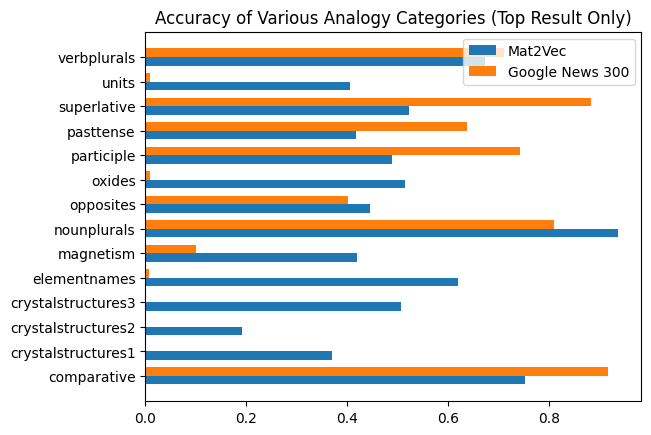

In [60]:
labels = list(scores.keys())
scores_values = list(scores.values())
w_scores_values = list(w_scores.values())

n = len(scores)
bar_width = 0.35
index = np.arange(n)
fig, ax = plt.subplots()

bar1 = ax.barh(index, scores_values, bar_width, label='Mat2Vec')
bar2 = ax.barh(index + bar_width, w_scores_values, bar_width, label='Google News 300')

ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(labels)

plt.title("Accuracy of Various Analogy Categories (Top Result Only)")
plt.legend()

plt.show()

Now, extend the model to include the top 5 results as a correct answer.

In [61]:
w_scores5 = {}
w_notfound5 = {}
w_vocabulary = w2v_model.index_to_key
for extension in extensions:
    print("Evaluating " + extension)
    analogies = cleaned_data[extension]
    num_trials = len(analogies)
    num_correct = 0
    num_notfound = 0
    for analogy in analogies:
        if analogy[0] not in w_vocabulary or analogy[1] not in w_vocabulary or analogy[2] not in w_vocabulary:
            #print("Analogy has words not found in vocabulary:\t" + str(analogy))
            num_notfound += 1
        else:
            #TODO: test the accuracy of the model for each analogy and find its accuracy
            guesses = w2v_model.most_similar(positive=[analogy[1], analogy[2]], negative=[analogy[0]], topn=5)
            guesses = [guess[0] for guess in guesses]
            if analogy[3] in guesses:
                num_correct += 1
            #TODO: ^^^^^^^

    w_scores5[extension] = num_correct/(num_trials-num_notfound)
    w_notfound5[extension] = num_notfound

w_scores5

Evaluating comparative
Evaluating crystalstructures1
Evaluating crystalstructures2
Evaluating crystalstructures3
Evaluating elementnames
Evaluating magnetism
Evaluating nounplurals
Evaluating opposites
Evaluating oxides
Evaluating participle
Evaluating pasttense
Evaluating superlative
Evaluating units
Evaluating verbplurals


{'comparative': 0.9723076923076923,
 'crystalstructures1': 0.0,
 'crystalstructures2': 0.0,
 'crystalstructures3': 0.0008347245409015025,
 'elementnames': 0.020731042007637753,
 'magnetism': 0.13333333333333333,
 'nounplurals': 0.9025974025974026,
 'opposites': 0.5712250712250713,
 'oxides': 0.024,
 'participle': 0.8990575396825397,
 'pasttense': 0.898014888337469,
 'superlative': 0.98,
 'units': 0.039473684210526314,
 'verbplurals': 0.9213709677419355}

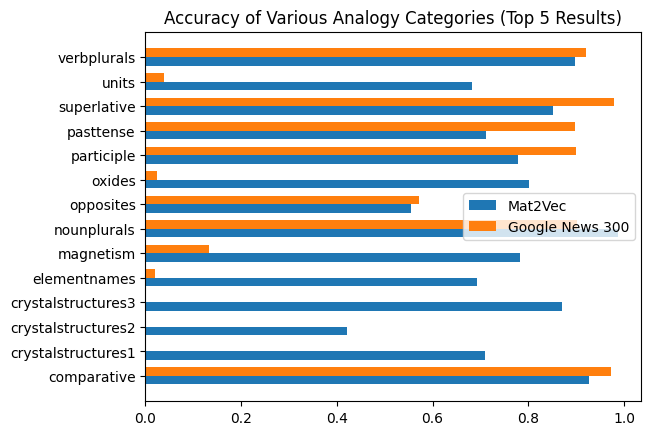

In [62]:
labels = list(scores.keys())
scores_values = list(scores5.values())
w_scores_values = list(w_scores5.values())

n = len(scores)
bar_width = 0.35
index = np.arange(n)
fig, ax = plt.subplots()

bar1 = ax.barh(index, scores_values, bar_width, label='Mat2Vec')
bar2 = ax.barh(index + bar_width, w_scores_values, bar_width, label='Google News 300')

ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(labels)

plt.title("Accuracy of Various Analogy Categories (Top 5 Results)")
plt.legend()

plt.show()

**Question 9:** For which categories does Mat2Vec outperform the general-purpose embeddings? For which categories does the Google News 300 model outperform the specialized embeddings?

*Solution:* Mat2Vec outperforms in every scientific category (unit names, crystal structures, etc.), plus opposites and plural nouns. The Google News 300 model performs better in all other categories, which are all grammatical/linguistic.

**Question 10:** Comment on the benefits and drawbacks of using large, general purpose corpora (NLP training sets) and specialized corpora. List at least 1 pro and 1 con of each.

*Solution:* Models trained from general purpose corpora tend to be better at grammatical tasks than those trained from specialized corpora, but they also are slower and less accurate in specific content areas. Models trained with specialized corpora are faster than those trained with larger vocabularies, but they perform worse on general linguistic tasks and will likely do poorly in content areas outside of their training domains.